##Honey Production

In this project, we delve into the critical situation facing honeybees, essential pollinators for agricultural ecosystems. Media reports often underscore the alarming decline in honeybee populations attributed to diverse factors. Our objective is to investigate this decline by examining historical trends, thereby gaining insights into the future trajectory of honeybee populations.

The dataset utilized for this analysis is sourced from Kaggle and is provided alongside the notebook for reference.

In [51]:
# loading initial libraries
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
#loading the data
df = pd.read_csv("./data.csv",delimiter=";")
#first five rows
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [53]:
#finding out which years were given
df.year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

In [54]:
#in which state we are predicting the production
prod_per_year = df.groupby(["state","year"]).totalprod.mean().reset_index()

In [55]:
#lets create the x and y columns for prediction
#X = prod_per_year["state"]
X = prod_per_year[prod_per_year.state== "AR"]["year"]
print(X)

X = X.values.reshape(-1,1)
#print(x)

y = prod_per_year[prod_per_year.state== "AR"]["totalprod"]


15    1998
16    1999
17    2000
18    2001
19    2002
20    2003
21    2004
22    2005
23    2006
24    2007
25    2008
26    2009
27    2010
28    2011
29    2012
Name: year, dtype: int64


In [56]:
#prod_per_year
#prod_per_year[prod_per_year.state== "AR"]

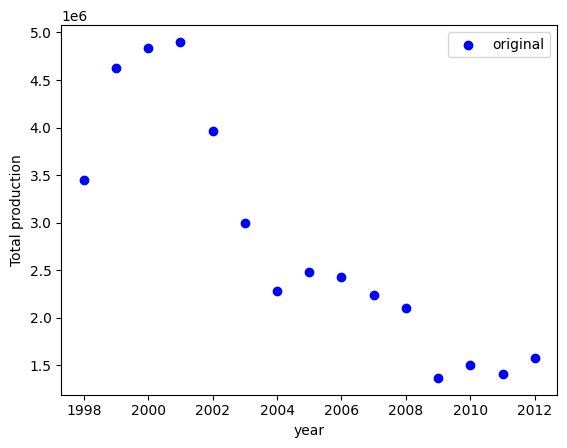

In [57]:
#taking AR as the state and making the figure of the total production in each year
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b", label = "original")
plt.legend()
plt.show()


In [58]:
#making the linier regression model
#loading the library
from sklearn import linear_model
Model= linear_model.LinearRegression()

In [59]:
## fit the data
Model.fit(X, y)
print("slope of the line: ",Model.coef_[0])
print("intercept of the line: ",Model.intercept_)

slope of the line:  -250592.85714285713
intercept of the line:  505249078.57142854


In [60]:
#loading the initial library
import numpy as np
X_future = np.array(range(2013,2051))
X_future = X_future.reshape(-1,1)

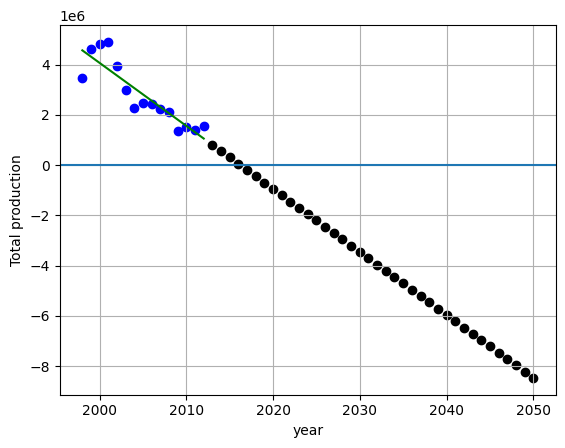

In [65]:
#predict the future total production
future_predict = Model.predict(X_future)

# prediction
y_predict = Model.predict(X)

#plot the prediction
plt.xlabel("year")
plt.ylabel("Total production")
plt.scatter(X, y, color = "b", label = "original")
plt.plot(X, y_predict, color = "g", label = "fit")
plt.axhline(0)
plt.grid()
plt.scatter(X_future, future_predict, color = "k", label = "prediction")
plt.show()

In [67]:
X = prod_per_year[prod_per_year.state=="AR"]["year"]
X = X.values.reshape(-1,1)
y = prod_per_year[prod_per_year.state=="AR"]["totalprod"] 
#fit the data
Model.fit(X,y)

print("slope of the line:",Model.coef_[0])
print("intercept of the line:",Model.intercept_)


slope of the line: -250592.85714285713
intercept of the line: 505249078.57142854


In [70]:
#Examining it with the random state of 25
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state= 25)

In [71]:
#fiting the model
Model.fit(X_train,y_train)
print("slope of the line:",Model.coef_[0])
print("intercept of the line:",Model.intercept_)

slope of the line: -296826.0869565218
intercept of the line: 598020945.6521741


In [75]:
#Examining it with the random state of None
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state= None)
Model.fit(X_train,y_train)
print("slope of the line:",Model.coef_[0])
print("intercept of the line:",Model.intercept_)

slope of the line: -209906.89281847718
intercept of the line: 423500765.78852415
